In [1]:
!pip install -q transformers

     |████████████████████████████████| 3.5 MB 7.6 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 49.7 MB/s 
     |████████████████████████████████| 6.8 MB 37.7 MB/s 
     |████████████████████████████████| 895 kB 53.7 MB/s 


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [4]:
youtube_video = "https://www.youtube.com/watch?v=HQsP2dWIT5Q"

In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'HQsP2dWIT5Q'

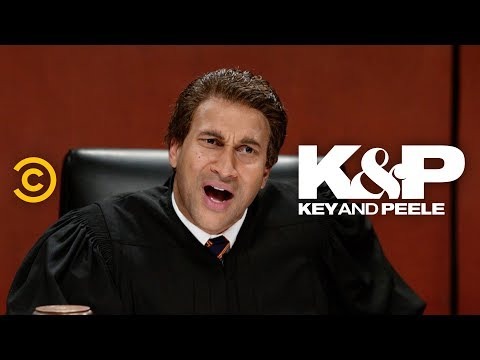

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [9]:
transcript[0:5]

[{'duration': 6.3,
  'start': 0.03,
  'text': 'today on judge Jessie judge Jessie turns'},
 {'duration': 4.679,
  'start': 3.51,
  'text': 'up the heat signed a piece of paper he'},
 {'duration': 5.58,
  'start': 6.33,
  'text': 'gave you the snake then you bring a'},
 {'duration': 5.61,
  'start': 8.189,
  'text': 'snake into the home applause I had not'},
 {'duration': 3.45,
  'start': 11.91,
  'text': 'been made aware that the snake would get'}]

In [10]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

1380


In [11]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 today on judge Jessie judge Jessie turns up the heat signed a piece of paper he gave you the snake then you bring a snake into the home applause I had not been made aware that the snake would get rid of his skin and then the sprinklers came down with the snakeskin ruined my carpet what what set off the sprinklers unrelated popcorn fire your honor judge Jessie as a police officer he defended the streets as a trial lawyer objection he fought for the truth as a black belt he mastered discipline as a carpenter he learned the value of craftsmanship as the surgeon he mastered a cool head as a crack ho he learned to go days without sleep and as an announcer he does the voiceover on this show coming up on judge just a mr. Simmons before you speak I know from experience that the police have completely mishandled her case and there's legal precedent for you to win and any good defense attorney would have told you that I also know that obviously the place where you hurt your back was

Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


Summarized text
 Judge Jessie turns up the heat today on judge Jessie . He signed a piece of paper signed a snake then you bring a snake into the home applause I had not been made aware that the snake would get rid of his skin and then the sprinklers came down with the snakeskin ruined my carpet .
input text 
ally up to code mr. Oyama and furthermore as a sensei you should know a man of his skill set cannot do a Mike yaki you should know that obviously I can tell by looking at your alignment that you've herniated a disc someplace in your l4 or l5 I'm finding for the plaintiff not $2,500 $2,700 mr. Oyama thank you your honor you're quite welcome yeah yes dusty kind of second Nick you
Summarized text
 Mr. Oyama should know a man of his skill set cannot do a Mike yaki . He should know that obviously I can tell by looking at your alignment that you've herniated a disc someplace in your l4 or l5 I'm finding for the plaintiff not $2,500 .


In [13]:
len(str(summarized_text))

528

In [14]:
str(summarized_text)

'[\' Judge Jessie turns up the heat today on judge Jessie . He signed a piece of paper signed a snake then you bring a snake into the home applause I had not been made aware that the snake would get rid of his skin and then the sprinklers came down with the snakeskin ruined my carpet .\', " Mr. Oyama should know a man of his skill set cannot do a Mike yaki . He should know that obviously I can tell by looking at your alignment that you\'ve herniated a disc someplace in your l4 or l5 I\'m finding for the plaintiff not $2,500 ."]'